In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
)

Found 1506 images belonging to 3 classes.


In [4]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
count=0
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.73915935 0.6685711  0.660728  ]
  [0.73893064 0.6683424  0.6604993 ]
  [0.738702   0.66811377 0.66027063]
  ...
  [0.5168317  0.40310618 0.41879246]
  [0.60471684 0.49099138 0.5066776 ]
  [0.58357793 0.46985242 0.4855387 ]]

 [[0.7178859  0.6472977  0.63945454]
  [0.7188006  0.6482124  0.64036924]
  [0.7197153  0.64912707 0.6412839 ]
  ...
  [0.52014744 0.4064219  0.42210817]
  [0.6042595  0.49053404 0.5062203 ]
  [0.5823203  0.46859473 0.484281  ]]

 [[0.6952557  0.62466747 0.6168243 ]
  [0.69582736 0.62523913 0.617396  ]
  [0.69639903 0.6258108  0.61796767]
  ...
  [0.52346313 0.40973768 0.42542395]
  [0.60380214 0.4900767  0.50576293]
  [0.5810625  0.46733704 0.48302332]]

 ...

 [[0.63157237 0.553141   0.55706257]
  [0.6406528  0.5622214  0.566143  ]
  [0.64045966 0.5620283  0.56594986]
  ...
  [0.5134467  0.39972118 0.4075643 ]
  [0.5143614  0.40063587 0.408479  ]
  [0.5152761  0.40155056 0.4093937 ]]

 [[0.6319154  0.553484   0.5574056 ]
  [0.6408814  0.56245005 0.5663716 ]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [9]:
for image_batch,label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.59612435 0.5529871  0.5686734 ]
  [0.59788084 0.5547436  0.57042986]
  [0.59963727 0.5565     0.5721863 ]
  ...
  [0.72195536 0.69842595 0.7141122 ]
  [0.7299853  0.7064559  0.72214216]
  [0.7609177  0.7373883  0.7530746 ]]

 [[0.532681   0.48954374 0.50523   ]
  [0.5369746  0.49383733 0.50952363]
  [0.54126817 0.49813095 0.5138172 ]
  ...
  [0.721565   0.6980356  0.7137219 ]
  [0.73135144 0.707822   0.7235083 ]
  [0.76267415 0.73914474 0.754831  ]]

 [[0.5114283  0.46829107 0.48397735]
  [0.509867   0.46672976 0.48241603]
  [0.5083057  0.46516845 0.48085475]
  ...
  [0.7211747  0.6976453  0.7133316 ]
  [0.7327176  0.70918816 0.72487444]
  [0.76443064 0.74090123 0.7565875 ]]

 ...

 [[0.5579986  0.53054756 0.5579986 ]
  [0.5807019  0.5532509  0.5807019 ]
  [0.6369053  0.60945433 0.6369053 ]
  ...
  [0.7507908  0.73118293 0.75471234]
  [0.75215685 0.732549   0.7560784 ]
  [0.75352305 0.7339152  0.7574446 ]]

 [[0.55760825 0.53015727 0.55760825]
  [0.5846052  0.55715424 0.5846052 ]


## Building the Model

In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
1506/32

47.0625

In [14]:
215/32

6.71875

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 44s 807ms/step - loss: 0.9405 - accuracy: 0.4803 - val_loss: 0.8919 - val_accuracy: 0.4688
Epoch 2/20
47/47 [==============================] - 35s 753ms/step - loss: 0.8158 - accuracy: 0.5868 - val_loss: 0.6393 - val_accuracy: 0.7604
Epoch 3/20
47/47 [==============================] - 35s 753ms/step - loss: 0.6242 - accuracy: 0.7483 - val_loss: 0.5914 - val_accuracy: 0.7917
Epoch 4/20
47/47 [==============================] - 36s 757ms/step - loss: 0.5510 - accuracy: 0.7761 - val_loss: 0.4799 - val_accuracy: 0.7865
Epoch 5/20
47/47 [==============================] - 35s 746ms/step - loss: 0.4253 - accuracy: 0.8311 - val_loss: 0.5246 - val_accuracy: 0.7969
Epoch 6/20
47/47 [==============================] - 35s 760ms/step - loss: 0.4014 - accuracy: 0.8446 - val_loss: 0.3728 - val_accuracy: 0.8438
Epoch 7/20
47/47 [==============================] - 35s 748ms/step - loss: 0.2553 - accuracy: 0.9084 - val_loss: 0.2701 - val_accuracy: 0.9062

In [16]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 12s 869ms/step - loss: 0.1440 - accuracy: 0.9350


In [17]:
scores

[0.14398819208145142, 0.9350348114967346]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [18]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [19]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [21]:
type(history.history['loss'])

list

In [22]:
len(history.history['loss'])

20

In [23]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9404815435409546,
 0.8158358931541443,
 0.6242260336875916,
 0.5510126948356628,
 0.4252924621105194]

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [25]:
val_acc

[0.46875,
 0.7604166865348816,
 0.7916666865348816,
 0.7864583134651184,
 0.796875,
 0.84375,
 0.90625,
 0.9114583134651184,
 0.9375,
 0.921875,
 0.9427083134651184,
 0.96875,
 0.96875,
 0.8125,
 0.90625,
 0.9270833134651184,
 0.9375,
 0.9583333134651184,
 0.9010416865348816,
 0.9375]

In [26]:
acc

[0.4803256392478943,
 0.5868385434150696,
 0.7483039498329163,
 0.7761194109916687,
 0.8310719132423401,
 0.8446404337882996,
 0.9084124565124512,
 0.9280868172645569,
 0.9274083971977234,
 0.9477611780166626,
 0.9219809770584106,
 0.9701492786407471,
 0.9606512784957886,
 0.8900949954986572,
 0.9009497761726379,
 0.9267299771308899,
 0.9464043378829956,
 0.9640434384346008,
 0.9552238583564758,
 0.9321573972702026]

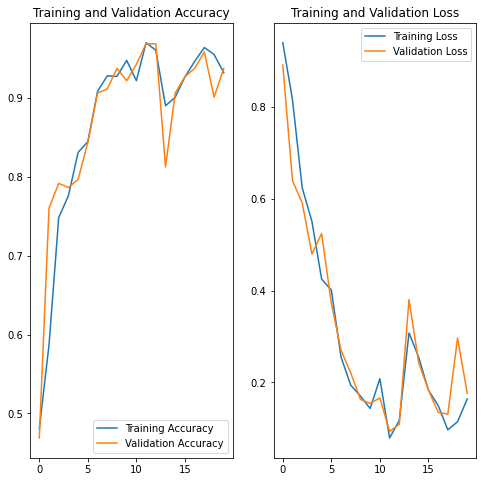

In [27]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Potato___Late_blight
predicted label: Potato___Late_blight


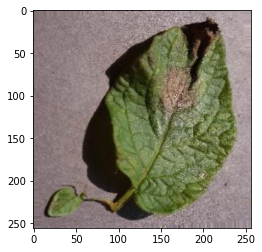

In [63]:
import numpy as np


for image_batch,label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [67]:
model.save("../potatoes.h5")